In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [2]:
heart=pd.read_csv(r"C:\Users\GCE\Downloads\heart.csv")
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [44]:
heart.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

| Column Name        | Description                                                                                                                                                                                       | Data Type (Before Encoding) |
| ------------------ | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | --------------------------- |
| **Age**            | The age of the person in years.                                                                                                                                                                   | Numerical                   |
| **Sex**            | The gender of the person — usually **M** for male and **F** for female.                                                                                                                           | Categorical                 |
| **ChestPainType**  | Type of chest pain experienced by the patient. Common categories:  <br>• **TA** – Typical Angina  <br>• **ATA** – Atypical Angina  <br>• **NAP** – Non-Anginal Pain  <br>• **ASY** – Asymptomatic | Categorical                 |
| **RestingBP**      | Resting blood pressure (in mm Hg) when the patient is at rest.                                                                                                                                    | Numerical                   |
| **Cholesterol**    | Serum cholesterol level (in mg/dl).                                                                                                                                                               | Numerical                   |
| **FastingBS**      | Fasting blood sugar (> 120 mg/dl). Usually 1 = True, 0 = False.                                                                                                                                   | Binary (0/1)                |
| **RestingECG**     | Results of resting electrocardiogram. Common categories:  <br>• **Normal**  <br>• **ST** – ST-T wave abnormality  <br>• **LVH** – Left ventricular hypertrophy                                    | Categorical                 |
| **MaxHR**          | Maximum heart rate achieved during exercise.                                                                                                                                                      | Numerical                   |
| **ExerciseAngina** | Whether the patient had exercise-induced angina. 1 = Yes, 0 = No.                                                                                                                                 | Binary                      |
| **Oldpeak**        | ST depression induced by exercise relative to rest. Indicates possible heart stress.                                                                                                              | Numerical                   |
| **ST_Slope**       | The slope of the peak exercise ST segment. Common values:  <br>• **Up** – Upsloping  <br>• **Flat** – Flat  <br>• **Down** – Downsloping                                                          | Categorical                 |
| **HeartDisease**   | Target variable: 1 = presence of heart disease, 0 = absence.                                                                                                                                      | Binary                      |


In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
for i in heart:
    print(i)
    print(heart[i].unique())

Age
[40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
Sex
['M' 'F']
ChestPainType
['ATA' 'NAP' 'ASY' 'TA']
RestingBP
[140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
Cholesterol
[289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290 212 231 222 235 320 187 266 287 404 312

while checking the unique of the dataset There is 0 in the columns "RestingBP","Cholesterol"

In [6]:
column=["RestingBP","Cholesterol"]
for col in column:
    heart[col]=heart[col].replace(0,np.nan)
    mode_value=heart[col].median()
    heart[col]=heart[col].fillna(mode_value)

In [7]:
heart.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
heart["RestingBP"].unique()

array([140., 160., 130., 138., 150., 120., 110., 136., 115., 100., 124.,
       113., 125., 145., 112., 132., 118., 170., 142., 190., 135., 180.,
       108., 155., 128., 106.,  92., 200., 122.,  98., 105., 133.,  95.,
        80., 137., 185., 165., 126., 152., 116., 144., 154., 134., 104.,
       139., 131., 141., 178., 146., 158., 123., 102.,  96., 143., 172.,
       156., 114., 127., 101., 174.,  94., 148., 117., 192., 129., 164.])

In [9]:
heart["Cholesterol"].unique()

array([289., 180., 283., 214., 195., 339., 237., 208., 207., 284., 211.,
       164., 204., 234., 273., 196., 201., 248., 267., 223., 184., 288.,
       215., 209., 260., 468., 188., 518., 167., 224., 172., 186., 254.,
       306., 250., 177., 227., 230., 294., 264., 259., 175., 318., 216.,
       340., 233., 205., 245., 194., 270., 213., 365., 342., 253., 277.,
       202., 297., 225., 246., 412., 265., 182., 218., 268., 163., 529.,
       100., 206., 238., 139., 263., 291., 229., 307., 210., 329., 147.,
        85., 269., 275., 179., 392., 466., 129., 241., 255., 276., 282.,
       338., 160., 156., 272., 240., 393., 161., 228., 292., 388., 166.,
       247., 331., 341., 243., 279., 198., 249., 168., 603., 159., 190.,
       185., 290., 212., 231., 222., 235., 320., 187., 266., 287., 404.,
       312., 251., 328., 285., 280., 192., 193., 308., 219., 257., 132.,
       226., 217., 303., 298., 256., 117., 295., 173., 315., 281., 309.,
       200., 336., 355., 326., 171., 491., 271., 27

In [10]:
datadict=pd.DataFrame(heart.dtypes)
datadict["missingval"]=heart.isnull().sum()
datadict["Nunique"]=heart.nunique()
datadict["count"]=heart.count()
datadict=datadict.rename(columns={0:"data type"})
datadict


,data type,missingval,Nunique,count
Age,int64,0,50,918
Sex,object,0,2,918
ChestPainType,object,0,4,918
RestingBP,float64,0,66,918
Cholesterol,float64,0,221,918
FastingBS,int64,0,2,918
RestingECG,object,0,3,918
MaxHR,int64,0,119,918
ExerciseAngina,object,0,2,918
Oldpeak,float64,0,53,918


# VISUALYSATION

## 1. Age Distribution


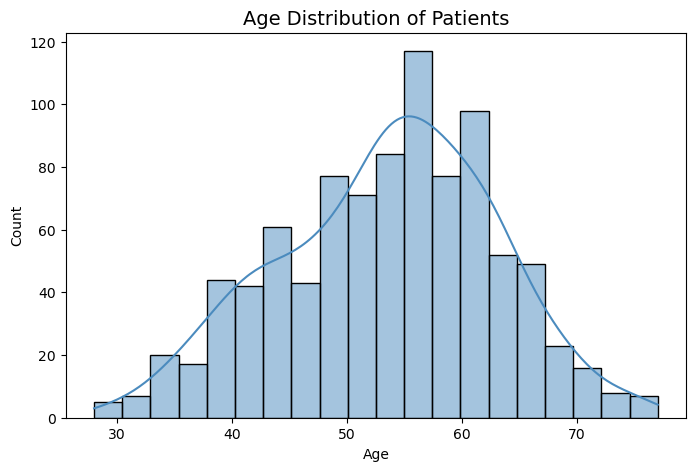

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(heart['Age'], bins=20, kde=True, color='#4B8BBE')  # Blue tone
plt.title('Age Distribution of Patients', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Visualization: Histogram or KDE Plot

Variables: Age (Numerical)

Purpose: To see the age spread of patients and identify which age group is more common. It helps understand if heart disease is frequent among certain age groups.

## 2. Gender Count


C:\Users\GCE\AppData\Local\Temp\ipykernel_11132\633299854.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=heart, palette=['#E06C75', '#61AFEF'])  # Red & Blue


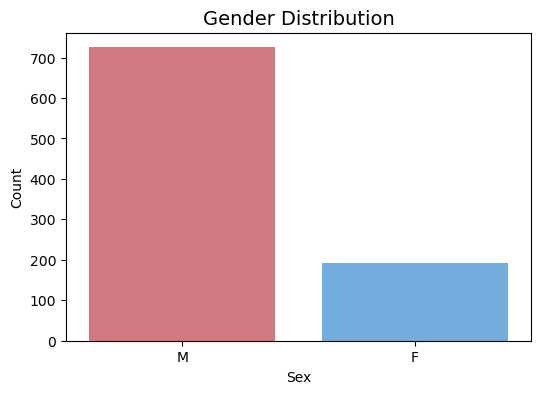

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', data=heart, palette=['#E06C75', '#61AFEF'])  # Red & Blue
plt.title('Gender Distribution', fontsize=14)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()



Visualization: Bar Chart

Variables: Sex (Categorical)

Purpose: To compare the number of male and female patients. Helps understand gender representation in the dataset.

## 3. Chest Pain Type Distribution


C:\Users\GCE\AppData\Local\Temp\ipykernel_11132\3334740417.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ChestPainType', data=heart, palette=['#98C379', '#E5C07B', '#C678DD', '#56B6C2'])  # Green, Yellow, Purple, Cyan


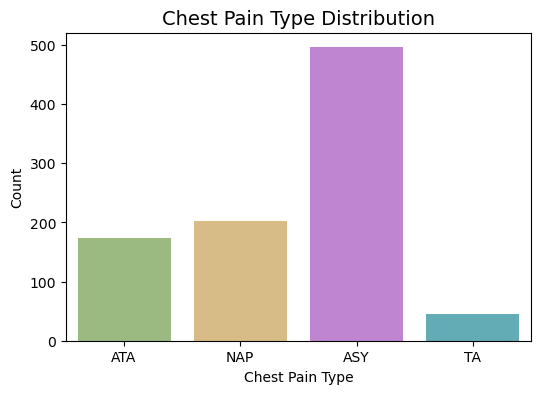

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x='ChestPainType', data=heart, palette=['#98C379', '#E5C07B', '#C678DD', '#56B6C2'])  # Green, Yellow, Purple, Cyan
plt.title('Chest Pain Type Distribution', fontsize=14)
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()



Visualization: Count Plot / Bar Chart

Variables: ChestPainType (Categorical)

Purpose: To observe which chest pain type is most common among patients. Useful for linking chest pain categories with heart disease.

## 4. Cholesterol vs Age


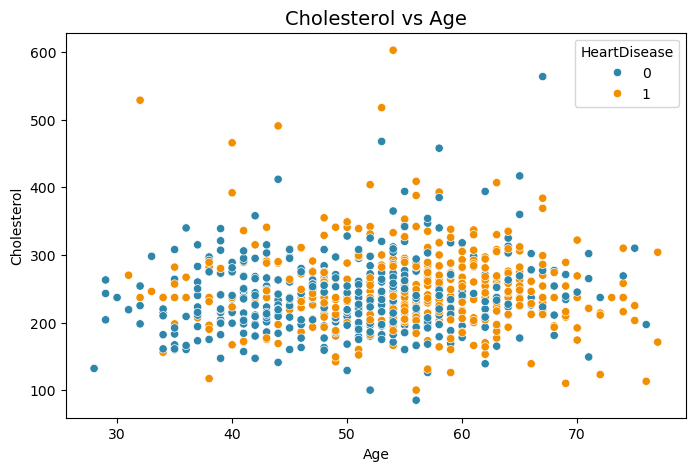

In [14]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Age', y='Cholesterol', data=heart, hue='HeartDisease', palette=['#2E86AB', '#F18F01'])  # Blue & Orange
plt.title('Cholesterol vs Age', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()


Visualization: Scatter Plot

Variables: Cholesterol (Numerical) vs Age (Numerical)

Purpose: To analyze the relationship between age and cholesterol levels. It helps see if cholesterol tends to increase with age.

## 5. Heart Disease vs Sex


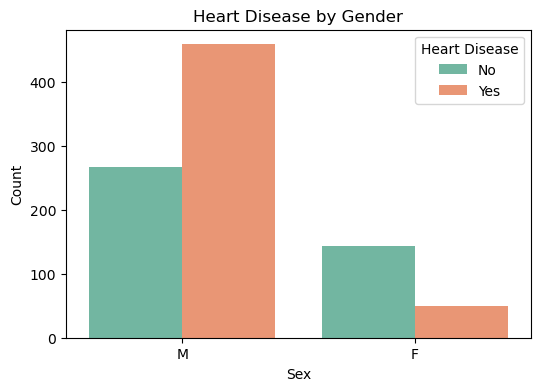

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='HeartDisease', data=heart, palette='Set2')
plt.title('Heart Disease by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

Visualization: Grouped Bar Chart

Variables: HeartDisease (Categorical) vs Sex (Categorical)

Purpose: To find out if one gender is more likely to have heart disease.

## 6. MaxHR Distribution by Heart Disease


C:\Users\GCE\AppData\Local\Temp\ipykernel_11132\3334348841.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y='MaxHR', data=heart, palette=['#F9E79F', '#BB8FCE'])  # Yellow & Purple


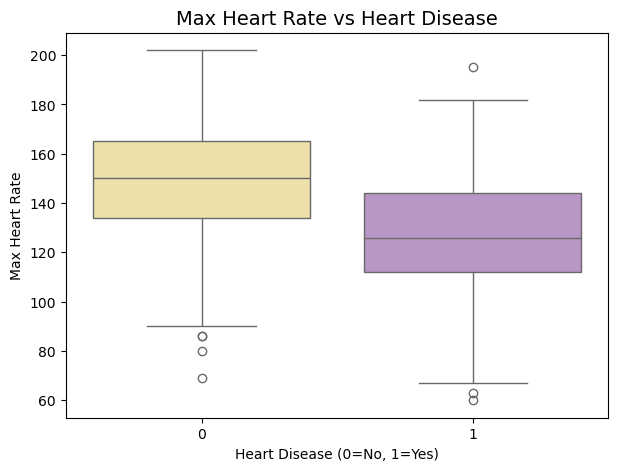

In [16]:
plt.figure(figsize=(7,5))
sns.boxplot(x='HeartDisease', y='MaxHR', data=heart, palette=['#F9E79F', '#BB8FCE'])  # Yellow & Purple
plt.title('Max Heart Rate vs Heart Disease', fontsize=14)
plt.xlabel('Heart Disease (0=No, 1=Yes)')
plt.ylabel('Max Heart Rate')
plt.show()


Visualization: Box Plot

Variables: MaxHR (Numerical) vs HeartDisease (Categorical)

Purpose: To compare maximum heart rate achieved between people with and without heart disease. It shows how heart rate differs across groups.

## 7. ST_Slope vs Heart Disease


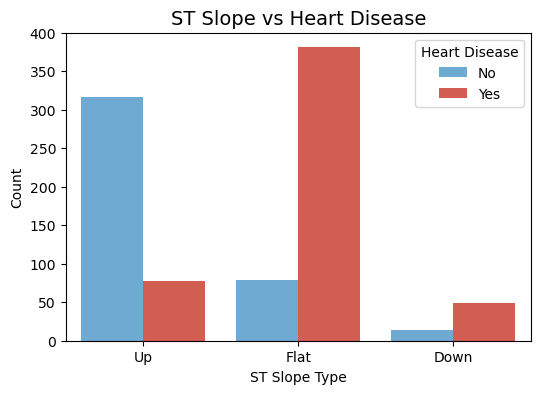

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x='ST_Slope', hue='HeartDisease', data=heart, palette=['#5DADE2', '#E74C3C'])  # Blue & Red
plt.title('ST Slope vs Heart Disease', fontsize=14)
plt.xlabel('ST Slope Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

Visualization: Stacked Bar Chart

Variables: ST_Slope (Categorical) vs HeartDisease (Categorical)

Purpose: To observe how ST slope types vary among patients with or without heart disease.

## 8. Correlation Heatmap


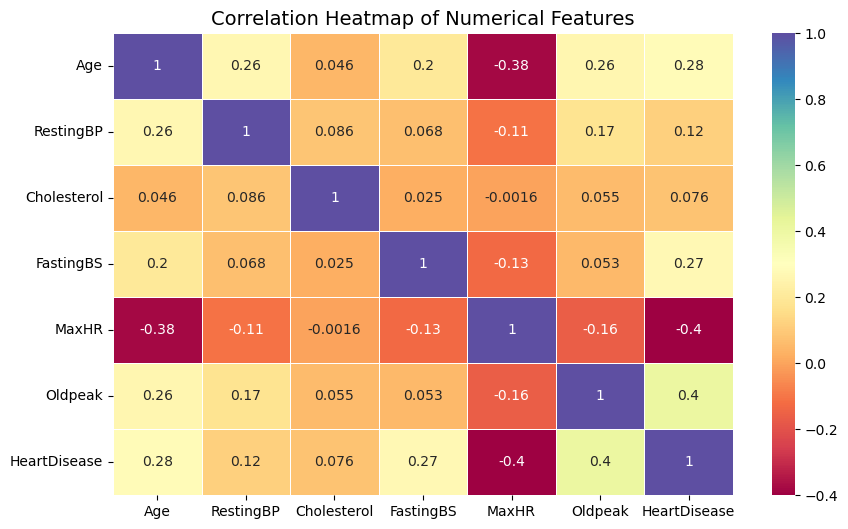

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(heart.corr(numeric_only=True), annot=True, cmap='Spectral', linewidths=0.4)
plt.title('Correlation Heatmap of Numerical Features', fontsize=14)
plt.show()

Visualization: Heatmap (Correlation Matrix)

Variables: All Numerical features (Age, RestingBP, Cholesterol, MaxHR, Oldpeak, etc.)

Purpose: To identify which numerical variables are strongly related to HeartDisease. Helps in feature selection for machine learning.

| Feature 1       | Feature 2    | Correlation | Simple Meaning                                                             |
| --------------- | ------------ | ----------- | -------------------------------------------------------------------------- |
| **Age**         | HeartDisease | 0.28        | As age increases, heart disease tends to increase slightly.                |
| **RestingBP**   | HeartDisease | 0.12        | Weak relation — blood pressure doesn’t strongly affect heart disease here. |
| **Cholesterol** | HeartDisease | 0.076       | Very weak relation with heart disease.                                     |
| **FastingBS**   | HeartDisease | 0.27        | Higher fasting blood sugar is somewhat linked with heart disease.          |
| **MaxHR**       | HeartDisease | -0.40       | Higher maximum heart rate means **less** chance of heart disease.          |
| **Oldpeak**     | HeartDisease | 0.40        | Larger ST depression (Oldpeak) increases the chance of heart disease.      |


## 9. PairPlot (PairGrid) for Numerical Relationships


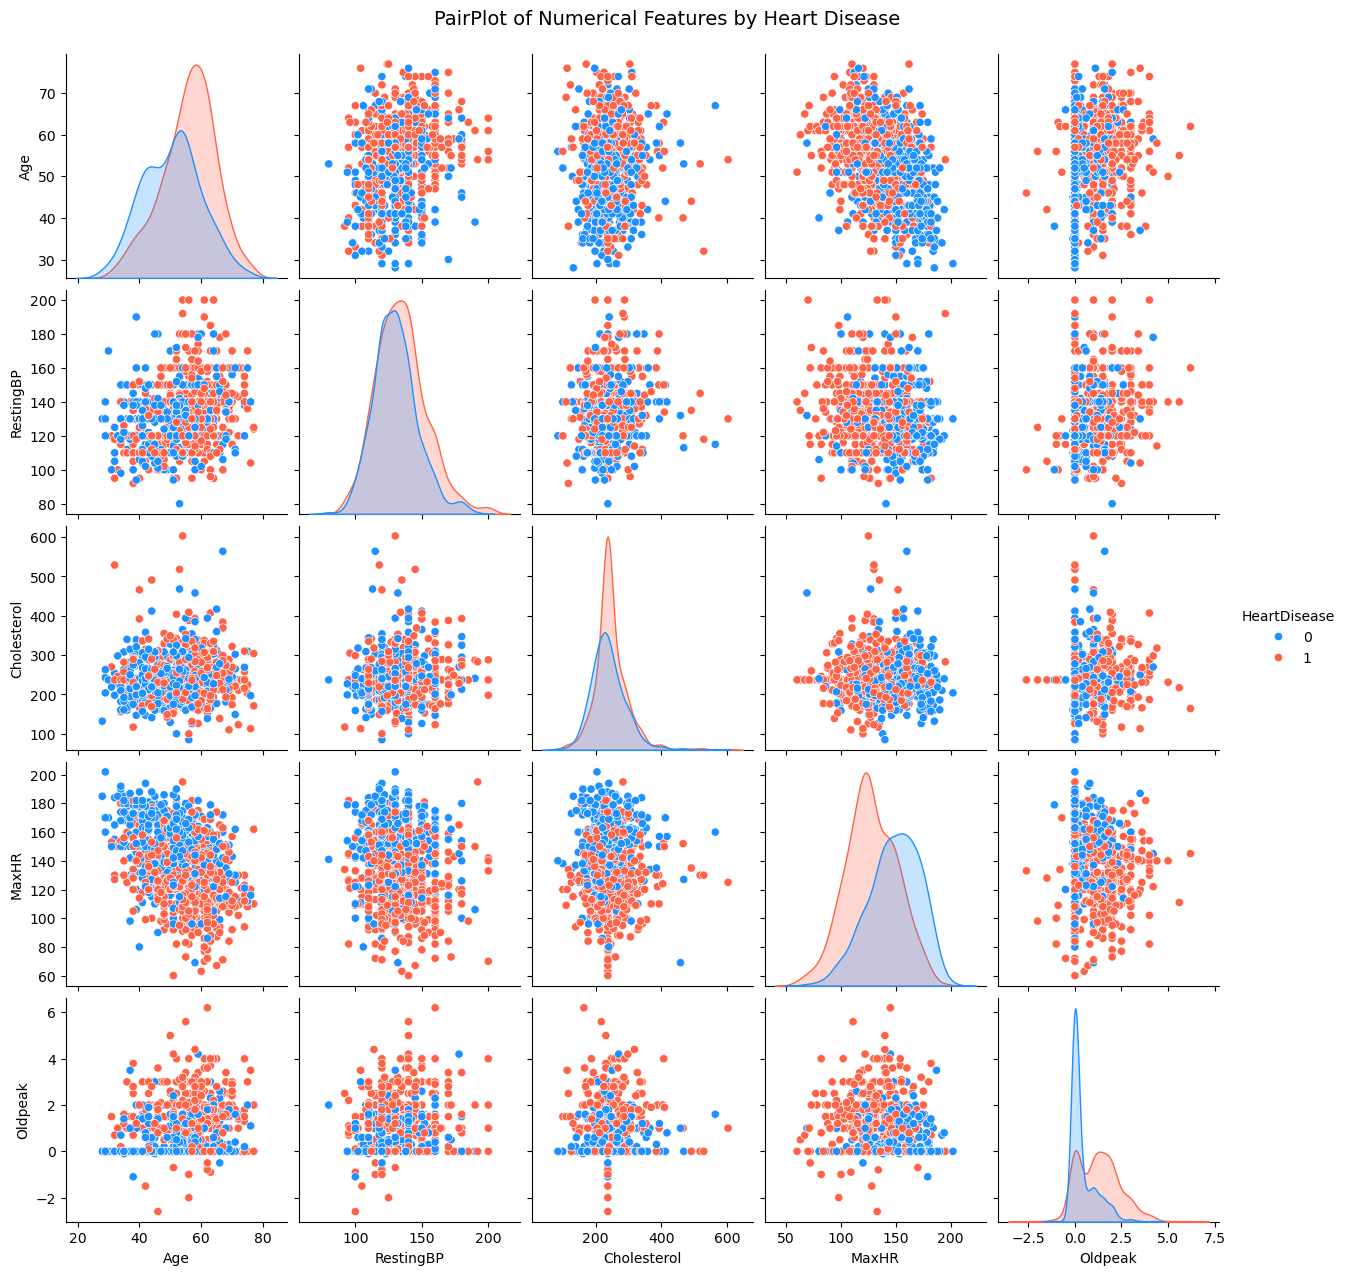

In [19]:
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

sns.pairplot(heart[num_cols + ['HeartDisease']], 
            hue='HeartDisease', 
            diag_kind='kde', 
            palette=['#1E90FF', '#FF6347'])  # Blue & Red for heart disease categories
plt.suptitle('PairPlot of Numerical Features by Heart Disease', y=1.02, fontsize=14)
plt.show()

### 1.Age vs MaxHR
As age increases, the maximum heart rate (MaxHR) usually decreases.
People with heart disease (red points) mostly have lower MaxHR values.
### 2.Cholesterol vs Age
There isn’t a very clear trend, but some older patients tend to have higher cholesterol
Both groups (disease and no disease) overlap here — so cholesterol alone may not decide heart risk.
### 3.Oldpeak (ST depression) vs Other Features
People with higher Oldpeak values are more often in the heart disease category.
This shows ST depression (exercise test result) has a strong link to heart disease.
### 4.RestingBP vs Age or Cholesterol
The blood pressure (RestingBP) doesn’t vary much with age or cholesterol.
It’s scattered, showing that it’s not a clear single indicator of disease.
### 5.Diagonal Plots (Distributions)
The blue and red curves (for HeartDisease = 0 and 1) show the distribution of each numeric variable.

### In Simple Words

Heart disease patients often have:
Lower MaxHR
Higher Oldpeak
Age has a moderate effect — older people are somewhat more at risk.
Cholesterol and RestingBP alone don’t clearly separate healthy vs unhealthy people.

# ENCODING 

In [20]:
heart=pd.get_dummies(heart)
heart

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160.0,180.0,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130.0,283.0,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138.0,214.0,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150.0,195.0,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132,1.2,1,False,True,False,...,False,True,False,True,False,True,False,False,True,False
914,68,144.0,193.0,1,141,3.4,1,False,True,True,...,False,False,False,True,False,True,False,False,True,False
915,57,130.0,131.0,0,115,1.2,1,False,True,True,...,False,False,False,True,False,False,True,False,True,False
916,57,130.0,236.0,0,174,0.0,1,True,False,False,...,False,False,True,False,False,True,False,False,True,False


In [21]:
heart= heart.drop(columns=[
    'Sex_F',                  # drop one from 'Sex'
    'ChestPainType_ASY',      # drop one from 'ChestPainType'
    'RestingECG_LVH',         # drop one from 'RestingECG'
    'ExerciseAngina_N',       # drop one from 'ExerciseAngina'
    'ST_Slope_Down'           # drop one from 'ST_Slope'
])


In [22]:
heart

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160.0,180.0,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130.0,283.0,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138.0,214.0,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150.0,195.0,0,122,0.0,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132,1.2,1,True,False,False,True,True,False,False,True,False
914,68,144.0,193.0,1,141,3.4,1,True,False,False,False,True,False,False,True,False
915,57,130.0,131.0,0,115,1.2,1,True,False,False,False,True,False,True,True,False
916,57,130.0,236.0,0,174,0.0,1,False,True,False,False,False,False,False,True,False


## Main numerical data (actual measurements):
Age: Age of the person. 

RestingBP: Blood pressure while resting.

Cholesterol: Cholesterol level in the blood.

FastingBS: 1 if blood sugar > 120 mg/dL, else 0.

MaxHR: Maximum heart rate achieved.

Oldpeak: ST depression value (ECG reading).

HeartDisease: 1 = has heart disease, 0 = no heart disease.

## dummy (category) columns left after cleanup:
Sex_M: 1 = Male, 0 = Female

ChestPainType_ATA, ChestPainType_NAP, ChestPainType_TA: Different chest pain types

RestingECG_Normal, RestingECG_ST: ECG condition

ExerciseAngina_Y: 1 = Yes, 0 = No

ST_Slope_Flat, ST_Slope_Up: Shape of the ST slope in ECG

Each of these columns represents one specific category in a True/False form.

Together, they describe a person’s symptoms and conditions.


# SCALING 

HERE "ROBUSTSCALER" IS BEST BEACUSE OUTLIERS ARE NOT HANDLED 

In [23]:
from sklearn.preprocessing import RobustScaler

In [24]:
scaler=RobustScaler()

In [25]:
scaled_data=scaler.fit_transform(heart)

In [26]:
heart=pd.DataFrame(scaled_data,columns=heart.columns)

In [27]:
heart

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.076923,0.5,0.981132,0.0,0.944444,-0.400000,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0
1,-0.384615,1.5,-1.075472,0.0,0.500000,0.266667,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.307692,0.0,0.867925,0.0,-1.111111,-0.400000,-1.0,0.0,1.0,0.0,0.0,-1.0,1.0,0.0,-1.0,1.0
3,-0.461538,0.4,-0.433962,0.0,-0.833333,0.600000,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.000000,1.0,-0.792453,0.0,-0.444444,-0.400000,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.692308,-1.0,0.509434,0.0,-0.166667,0.400000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
914,1.076923,0.7,-0.830189,1.0,0.083333,1.866667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
915,0.230769,0.0,-2.000000,0.0,-0.638889,0.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
916,0.230769,0.0,-0.018868,0.0,1.000000,-0.400000,0.0,-1.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0


After using RobustScaler, all the numeric values in your dataset are scaled to a similar range. This means big numbers and small numbers are now balanced — for example, blood pressure and cholesterol won’t dominate smaller values like “oldpeak.”

RobustScaler also reduces the effect of outliers (unusual extreme values), so your model can learn more fairly from all data points.

# MODEL BUILDING 

In [28]:
x=heart.drop("HeartDisease",axis=1)

"HeartDisease" is the target column thats why it is droped from that

In [29]:
x

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.076923,0.5,0.981132,0.0,0.944444,-0.400000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0
1,-0.384615,1.5,-1.075472,0.0,0.500000,0.266667,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.307692,0.0,0.867925,0.0,-1.111111,-0.400000,0.0,1.0,0.0,0.0,-1.0,1.0,0.0,-1.0,1.0
3,-0.461538,0.4,-0.433962,0.0,-0.833333,0.600000,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.000000,1.0,-0.792453,0.0,-0.444444,-0.400000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.692308,-1.0,0.509434,0.0,-0.166667,0.400000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
914,1.076923,0.7,-0.830189,1.0,0.083333,1.866667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
915,0.230769,0.0,-2.000000,0.0,-0.638889,0.400000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
916,0.230769,0.0,-0.018868,0.0,1.000000,-0.400000,-1.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0


In [30]:
y=heart["HeartDisease"]

In [31]:
y

0     -1.0
1      0.0
2     -1.0
3      0.0
4     -1.0
      ... 
913    0.0
914    0.0
915    0.0
916    0.0
917   -1.0
Name: HeartDisease, Length: 918, dtype: float64

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
model=LogisticRegression()

In [36]:
model=model.fit(x_train,y_train)

In [37]:
y_pred=model.predict(x_test)

In [38]:
from sklearn.metrics import accuracy_score

# ACURACCY

In [39]:
accuracy=accuracy_score(y_test,y_pred)

In [40]:
accuracy

0.8586956521739131

Accuracy = 0.8586, which means your model correctly predicted about 85.86% of the test data.

In simple words:
model performs well, correctly predicting most of the cases — around 86 out of every 100 predictions are right.

# PREDICTION

In [41]:
new_data=[[-1.076923,0.5,0.981132,0.0,0.944444,-0.400000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0]]

In [42]:
predicted=model.predict(new_data)

C:\Users\GCE\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [43]:
predicted

array([-1.])